Project Objectives：
The theme of our final project revolves around exploring wine quality. The project will involve two datasets with more than 1000 rows. They are related to red and white variants of the Portuguese "Vinho Verde" wine. We first visualized this data to understand further the different indicators and their relationship with the quality. After that, we use their attribute information to build a regression model to predict wine quality. Moreover, we create a classification model to understand further which of the two wines is of better quality. We also make a simple user interface to allow users to predict wine quality by entering various wine indicators. To understand our project in detail, compare its report with the code in this Jupyter notebook. This project will demonstrate the flexible use of Python packages such as SKlearn, Pandas, and Matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
red = pd.read_csv('winequality-red.csv',sep=';')
white = pd.read_csv('winequality-white.csv',sep=';')

## PART I VIRTUALIZATION

In [3]:
# store wine type as an attribute
red['type'] = 'red'   
white['type'] = 'white'
# merge red and white wine datasets
wines = pd.concat([red, white])
# re-shuffle records to randomize data points
wines = wines.sample(frac = 1, random_state = 3).reset_index(drop = True)

In [4]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,5.9,0.180,0.28,1.0,0.037,24.0,88.0,0.99094,3.29,0.55,10.65,7,white
1,10.2,0.670,0.39,1.9,0.054,6.0,17.0,0.99760,3.17,0.47,10.00,5,red
2,8.4,0.715,0.20,2.4,0.076,10.0,38.0,0.99735,3.31,0.64,9.40,5,red
3,6.8,0.370,0.51,11.8,0.044,62.0,163.0,0.99760,3.19,0.44,8.80,5,white
4,8.9,0.750,0.14,2.5,0.086,9.0,30.0,0.99824,3.34,0.64,10.50,5,red


In [5]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


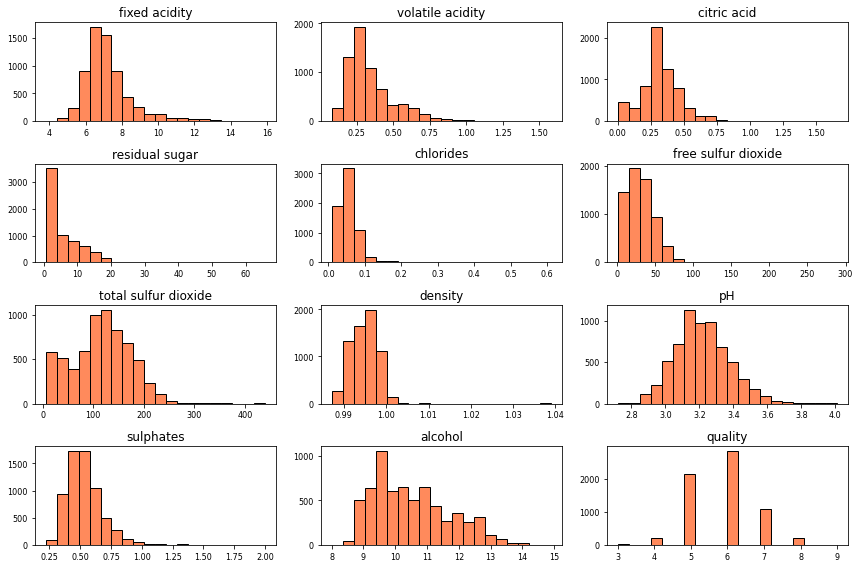

In [7]:
wines.hist(bins = 20, color = '#ff8a5c', edgecolor = 'black', 
           linewidth = 1.0, xlabelsize = 8, ylabelsize = 8, grid = False)    
plt.tight_layout(rect = (0, 0, 2, 2))

Using histograms to visualize all numeric data and understand the distribution, the plots above give us a first look at the distribution of all attribute data for red and white wines. And then, we'll drill down to looking at some of these continuous numeric attributes.

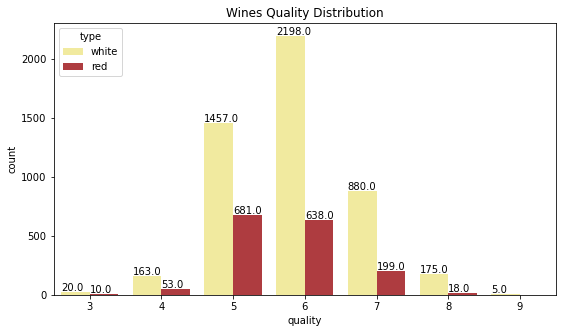

In [8]:
plt.figure(figsize = (9,5))
figquality = sns.countplot(x = 'quality', hue = 'type' , data = wines, 
                           palette = {"red": "#C1292E", "white": "#fff591"})
figquality.set_title("Wines Quality Distribution")
for p in figquality.patches:
    figquality.annotate(f'\n{p.get_height()}', 
                        (p.get_x(), p.get_height()+10), color ='black', size = 10)

The above plot shows the quality distribution of red and white wine, we can clearly see that the quliaty of wine is mainly concentrated in 5 and 6. Among them, the quality range of White wine is more extensive, ranging from 3 to 9, mainly concentrated in 6, and the total number of wine is 1.5 times that of quality 5; Red wine’s distribution of quality 5 and quality 6 is relatively similar, but significantly more than other quality rate.

Text(0.5, 1.0, 'Wines pH Distribution')

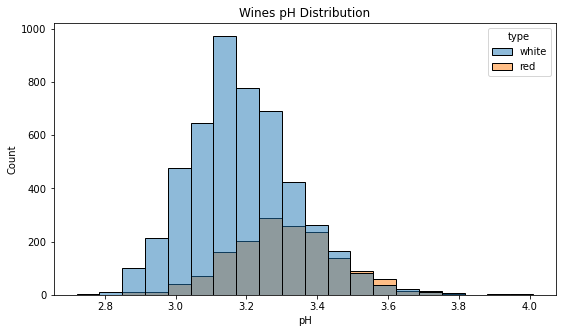

In [9]:
plt.figure(figsize = (9,5))
wineph = sns.histplot(wines, x = "pH", hue = 'type', bins = 20, )
wineph.set_title("Wines pH Distribution")

Through the pH distribution of red wine and white wine, we can find that the pH of the two wines is similar, and the white wine is generally more acidic. Most white wines have a pH in the 3.0-3.2 range, while most red wines have a pH in the 3.2-3.4 range. Also, in the range of 3.8-4.0 is almost red wine.

<AxesSubplot:>

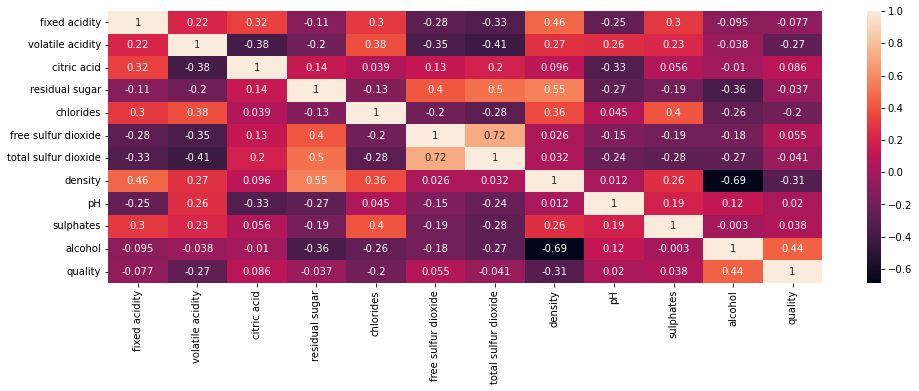

In [10]:
plt.figure(figsize = (16,5))
sns.heatmap(wines.corr(), annot = True)

We used heatmaps to examine potential relationships between different data attributes. And established a pivot table, in order to explore more interesting information.

In [11]:
table = pd.pivot_table(wines, index = ['quality']).round(3)
table.sort_values(by = 'alcohol', ascending = True)

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,
5,9.838,0.065,0.308,0.996,7.327,30.237,3.212,5.804,0.526,120.839,0.390
4,10.180,0.060,0.272,0.995,7.289,20.637,3.232,4.154,0.506,103.433,0.458
3,10.215,0.077,0.281,0.996,7.853,39.217,3.258,5.140,0.506,122.033,0.517
6,10.588,0.054,0.324,0.995,7.177,31.165,3.218,5.550,0.533,115.411,0.314
7,11.386,0.045,0.335,0.993,7.129,30.422,3.228,4.732,0.547,108.499,0.289
8,11.679,0.041,0.333,0.993,6.835,34.534,3.223,5.383,0.512,117.518,0.291
9,12.180,0.027,0.386,0.991,7.420,33.400,3.308,4.120,0.466,116.000,0.298


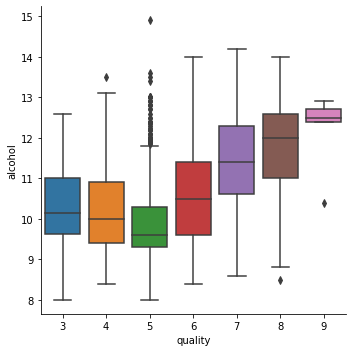

In [12]:
sns.catplot(x = "quality", y = "alcohol", kind = "box", data = wines)

Through the boxplot, we can notice the relationship between wine quality and alcohol content, the average alcohol content of quality 3-5 decreases, while the average alcohol content of quality 5-9 gradually increases. Quality 5 and up, the higher the quality, the higher the alcohol content. Among them, the alcohol content of wine with quality 5 has a wider distribution range, and the alcohol content of wine with quality 9 is more concentrated than other qualities.

<AxesSubplot:xlabel='sulphates', ylabel='residual sugar'>

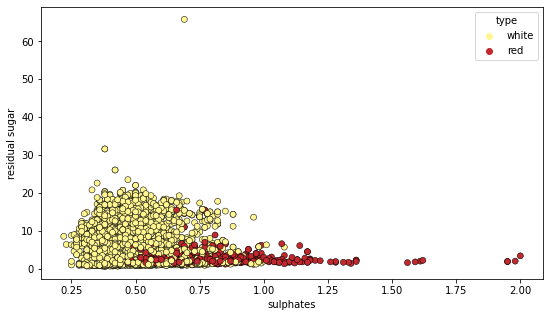

In [13]:
plt.figure(figsize = (9,5))
sns.scatterplot(x = "sulphates", y = "residual sugar", hue = "type", 
                palette = {"red": "#C1292E", "white": "#fff591"},
                edgecolor = "k", linewidth = 0.5, data = wines)

Since we were interested in the relationship of wine attributes, a scatter plot of sulphates and residual sugar is made, and we observed the different characteristics of red wine and white wine. As can be seen from the plot above, although there is very weak correlation, we can still notice sulphates are slightly higher for red wines than white wines, while white wine has residual sugar is significantly for white wines as compare to red wine.

## PART II CLASSIFICATION

In [14]:
wines = pd.get_dummies(data=wines,columns=['type'],drop_first=True)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = wines.drop(['quality'],axis=1)
y = wines['quality']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
clf = RandomForestClassifier(n_estimators=150,max_depth=11,max_features=9)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=11, max_features=9, n_estimators=150)

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
param_grid = {
    'n_estimators':[100,150,200],
    'max_depth':[5,10,15],
    'max_features':[7,9,11],
    'min_samples_leaf':[10,15,20],
}
grid = GridSearchCV(estimator=clf,param_grid=param_grid,cv=5,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[CV 1/5] END max_depth=5, max_features=7, min_samples_leaf=10, n_estimators=100;, score=0.565 total time=   0.3s
[CV 2/5] END max_depth=5, max_features=7, min_samples_leaf=10, n_estimators=100;, score=0.541 total time=   0.3s
[CV 3/5] END max_depth=5, max_features=7, min_samples_leaf=10, n_estimators=100;, score=0.576 total time=   0.4s
[CV 4/5] END max_depth=5, max_features=7, min_samples_leaf=10, n_estimators=100;, score=0.549 total time=   0.4s
[CV 5/5] END max_depth=5, max_features=7, min_samples_leaf=10, n_estimators=100;, score=0.564 total time=   0.3s
[CV 1/5] END max_depth=5, max_features=7, min_samples_leaf=10, n_estimators=150;, score=0.575 total time=   0.5s
[CV 2/5] END max_depth=5, max_features=7, min_samples_leaf=10, n_estimators=150;, score=0.536 total time=   0.5s
[CV 3/5] END max_depth=5, max_features=7, min_samples_leaf=10, n_estimators=150;, score=0.576 total time=   0.5s
[CV 4/5] END max_depth=5, max_features=7, min_samples_leaf=10, n_estimators=150;, score=0.560 to

[CV 4/5] END max_depth=5, max_features=9, min_samples_leaf=15, n_estimators=200;, score=0.555 total time=   0.9s
[CV 5/5] END max_depth=5, max_features=9, min_samples_leaf=15, n_estimators=200;, score=0.560 total time=   0.9s
[CV 1/5] END max_depth=5, max_features=9, min_samples_leaf=20, n_estimators=100;, score=0.568 total time=   0.4s
[CV 2/5] END max_depth=5, max_features=9, min_samples_leaf=20, n_estimators=100;, score=0.531 total time=   0.4s
[CV 3/5] END max_depth=5, max_features=9, min_samples_leaf=20, n_estimators=100;, score=0.573 total time=   0.4s
[CV 4/5] END max_depth=5, max_features=9, min_samples_leaf=20, n_estimators=100;, score=0.545 total time=   0.4s
[CV 5/5] END max_depth=5, max_features=9, min_samples_leaf=20, n_estimators=100;, score=0.566 total time=   0.4s
[CV 1/5] END max_depth=5, max_features=9, min_samples_leaf=20, n_estimators=150;, score=0.575 total time=   0.7s
[CV 2/5] END max_depth=5, max_features=9, min_samples_leaf=20, n_estimators=150;, score=0.538 to

[CV 2/5] END max_depth=10, max_features=7, min_samples_leaf=10, n_estimators=200;, score=0.552 total time=   1.2s
[CV 3/5] END max_depth=10, max_features=7, min_samples_leaf=10, n_estimators=200;, score=0.590 total time=   1.1s
[CV 4/5] END max_depth=10, max_features=7, min_samples_leaf=10, n_estimators=200;, score=0.580 total time=   1.2s
[CV 5/5] END max_depth=10, max_features=7, min_samples_leaf=10, n_estimators=200;, score=0.581 total time=   1.2s
[CV 1/5] END max_depth=10, max_features=7, min_samples_leaf=15, n_estimators=100;, score=0.583 total time=   0.5s
[CV 2/5] END max_depth=10, max_features=7, min_samples_leaf=15, n_estimators=100;, score=0.550 total time=   0.5s
[CV 3/5] END max_depth=10, max_features=7, min_samples_leaf=15, n_estimators=100;, score=0.583 total time=   0.5s
[CV 4/5] END max_depth=10, max_features=7, min_samples_leaf=15, n_estimators=100;, score=0.581 total time=   0.5s
[CV 5/5] END max_depth=10, max_features=7, min_samples_leaf=15, n_estimators=100;, score

[CV 4/5] END max_depth=10, max_features=9, min_samples_leaf=20, n_estimators=150;, score=0.571 total time=   0.9s
[CV 5/5] END max_depth=10, max_features=9, min_samples_leaf=20, n_estimators=150;, score=0.578 total time=   0.9s
[CV 1/5] END max_depth=10, max_features=9, min_samples_leaf=20, n_estimators=200;, score=0.572 total time=   1.4s
[CV 2/5] END max_depth=10, max_features=9, min_samples_leaf=20, n_estimators=200;, score=0.551 total time=   1.4s
[CV 3/5] END max_depth=10, max_features=9, min_samples_leaf=20, n_estimators=200;, score=0.580 total time=   1.3s
[CV 4/5] END max_depth=10, max_features=9, min_samples_leaf=20, n_estimators=200;, score=0.571 total time=   1.2s
[CV 5/5] END max_depth=10, max_features=9, min_samples_leaf=20, n_estimators=200;, score=0.574 total time=   1.2s
[CV 1/5] END max_depth=10, max_features=11, min_samples_leaf=10, n_estimators=100;, score=0.600 total time=   0.8s
[CV 2/5] END max_depth=10, max_features=11, min_samples_leaf=10, n_estimators=100;, sco

[CV 1/5] END max_depth=15, max_features=7, min_samples_leaf=15, n_estimators=150;, score=0.583 total time=   0.8s
[CV 2/5] END max_depth=15, max_features=7, min_samples_leaf=15, n_estimators=150;, score=0.550 total time=   0.8s
[CV 3/5] END max_depth=15, max_features=7, min_samples_leaf=15, n_estimators=150;, score=0.592 total time=   0.8s
[CV 4/5] END max_depth=15, max_features=7, min_samples_leaf=15, n_estimators=150;, score=0.564 total time=   0.8s
[CV 5/5] END max_depth=15, max_features=7, min_samples_leaf=15, n_estimators=150;, score=0.597 total time=   0.9s
[CV 1/5] END max_depth=15, max_features=7, min_samples_leaf=15, n_estimators=200;, score=0.583 total time=   1.1s
[CV 2/5] END max_depth=15, max_features=7, min_samples_leaf=15, n_estimators=200;, score=0.557 total time=   1.1s
[CV 3/5] END max_depth=15, max_features=7, min_samples_leaf=15, n_estimators=200;, score=0.600 total time=   1.1s
[CV 4/5] END max_depth=15, max_features=7, min_samples_leaf=15, n_estimators=200;, score

[CV 3/5] END max_depth=15, max_features=11, min_samples_leaf=10, n_estimators=100;, score=0.580 total time=   0.8s
[CV 4/5] END max_depth=15, max_features=11, min_samples_leaf=10, n_estimators=100;, score=0.577 total time=   0.8s
[CV 5/5] END max_depth=15, max_features=11, min_samples_leaf=10, n_estimators=100;, score=0.590 total time=   0.8s
[CV 1/5] END max_depth=15, max_features=11, min_samples_leaf=10, n_estimators=150;, score=0.592 total time=   1.3s
[CV 2/5] END max_depth=15, max_features=11, min_samples_leaf=10, n_estimators=150;, score=0.573 total time=   1.3s
[CV 3/5] END max_depth=15, max_features=11, min_samples_leaf=10, n_estimators=150;, score=0.586 total time=   1.3s
[CV 4/5] END max_depth=15, max_features=11, min_samples_leaf=10, n_estimators=150;, score=0.581 total time=   1.3s
[CV 5/5] END max_depth=15, max_features=11, min_samples_leaf=10, n_estimators=150;, score=0.602 total time=   1.2s
[CV 1/5] END max_depth=15, max_features=11, min_samples_leaf=10, n_estimators=20

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=11, max_features=9,
                                              n_estimators=150),
             param_grid={'max_depth': [5, 10, 15], 'max_features': [7, 9, 11],
                         'min_samples_leaf': [10, 15, 20],
                         'n_estimators': [100, 150, 200]},
             verbose=3)

In [22]:
grid.best_estimator_

RandomForestClassifier(max_depth=15, max_features=9, min_samples_leaf=10,
                       n_estimators=150)

In [23]:
pred_y = clf.predict(X_test)
pred_y1 = clf.predict(X_train)

In [24]:
from sklearn.metrics import confusion_matrix,classification_report

In [25]:
print(confusion_matrix(y_test,pred_y),'\n',confusion_matrix(y_train,pred_y1))
print()
print(classification_report(y_test,pred_y),classification_report(y_train,pred_y1))

[[  0   0   6   7   1   0   0]
 [  0   4  55  31   1   0   0]
 [  0   2 655 280  11   0   0]
 [  0   1 263 927  90   1   0]
 [  0   0  25 260 220   3   0]
 [  0   0   0  41  21  16   0]
 [  0   0   0   1   2   0   0]] 
 [[  14    0    1    1    0    0    0]
 [   0   86   26   13    0    0    0]
 [   0    0 1109   78    3    0    0]
 [   0    0   72 1477    5    0    0]
 [   0    0    4   60  507    0    0]
 [   0    0    1   22    9   83    0]
 [   0    0    0    1    1    0    0]]

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        14
           4       0.57      0.04      0.08        91
           5       0.65      0.69      0.67       948
           6       0.60      0.72      0.66      1282
           7       0.64      0.43      0.52       508
           8       0.80      0.21      0.33        78
           9       0.00      0.00      0.00         3

    accuracy                           0.62      2924
   macro avg       0.47 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metr

In [26]:
from sklearn.svm import SVC

In [27]:
model = SVC()

In [28]:
model.fit(X_train,y_train)

SVC()

In [29]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [30]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [31]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[CV 1/5] END ....................C=0.1, gamma=1;, score=0.434 total time=   1.8s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.435 total time=   1.8s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.435 total time=   1.8s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.436 total time=   1.8s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.436 total time=   1.8s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.434 total time=   1.4s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.432 total time=   1.3s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.435 total time=   1.3s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.436 total time=   1.3s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.436 total time=   1.4s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.448 total time=   0.7s
[CV 2/5] END .................C=0.1, gamma=0.01;, score=0.448 total time=   0.7s
[CV 3/5] END ...............

[CV 3/5] END ...................C=1000, gamma=1;, score=0.538 total time=   1.9s
[CV 4/5] END ...................C=1000, gamma=1;, score=0.542 total time=   1.9s
[CV 5/5] END ...................C=1000, gamma=1;, score=0.532 total time=   1.9s
[CV 1/5] END .................C=1000, gamma=0.1;, score=0.522 total time=   1.6s
[CV 2/5] END .................C=1000, gamma=0.1;, score=0.466 total time=   1.6s
[CV 3/5] END .................C=1000, gamma=0.1;, score=0.513 total time=   1.5s
[CV 4/5] END .................C=1000, gamma=0.1;, score=0.518 total time=   1.6s
[CV 5/5] END .................C=1000, gamma=0.1;, score=0.550 total time=   1.6s
[CV 1/5] END ................C=1000, gamma=0.01;, score=0.555 total time=   2.9s
[CV 2/5] END ................C=1000, gamma=0.01;, score=0.487 total time=   2.7s
[CV 3/5] END ................C=1000, gamma=0.01;, score=0.519 total time=   3.2s
[CV 4/5] END ................C=1000, gamma=0.01;, score=0.521 total time=   3.1s
[CV 5/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [32]:
pred_y = grid.predict(X_test)
pred_y1 = grid.predict(X_train)

In [33]:
print(confusion_matrix(y_test,pred_y),'\n',confusion_matrix(y_train,pred_y1))
print()
print(classification_report(y_test,pred_y),classification_report(y_train,pred_y1))

[[  1   2   8   3   0   0   0]
 [  1   4  59  23   4   0   0]
 [  2  15 629 286  14   2   0]
 [  0  10 361 813  93   4   1]
 [  1   0  42 315 149   1   0]
 [  0   1   5  48  19   5   0]
 [  0   0   0   1   2   0   0]] 
 [[  11    0    4    1    0    0    0]
 [   0   30   64   30    1    0    0]
 [   1    1  874  301   12    1    0]
 [   0    3  301 1173   76    1    0]
 [   2    0   25  328  215    1    0]
 [   0    0    9   55   30   21    0]
 [   0    0    0    0    0    0    2]]

              precision    recall  f1-score   support

           3       0.20      0.07      0.11        14
           4       0.12      0.04      0.07        91
           5       0.57      0.66      0.61       948
           6       0.55      0.63      0.59      1282
           7       0.53      0.29      0.38       508
           8       0.42      0.06      0.11        78
           9       0.00      0.00      0.00         3

    accuracy                           0.55      2924
   macro avg       0.34 

## PART III REGRESSION

In [34]:
red = pd.read_csv('winequality-red.csv',sep=';')
white = pd.read_csv('winequality-white.csv',sep=';')

In [35]:
# Linking red and white wine datasets together
white['type'] = 'white'
red['type'] = 'red'
wine = pd.concat([white,red])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [36]:
# Shuffling data-shuffle the sample data, but keep the data for each sample the same
wine_shuff = wine.sample(frac=1).reset_index(drop=True)
# After mixing, the index of the dataset is still sorted according to the normal order.
wine_shuff.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,6.3,0.25,0.44,11.6,0.041,48.0,195.0,0.99680,3.18,0.52,9.5,5,white
1,7.0,0.21,0.37,7.2,0.042,36.0,167.0,0.99580,3.26,0.56,9.8,6,white
2,10.7,0.67,0.22,2.7,0.107,17.0,34.0,1.00040,3.28,0.98,9.9,6,red
3,8.0,0.28,0.42,7.1,0.045,41.0,169.0,0.99590,3.17,0.43,10.6,5,white
4,5.5,0.16,0.26,1.5,0.032,35.0,100.0,0.99076,3.43,0.77,12.0,6,white


In [37]:
# Checking for NULL Values
Sum =wine_shuff.isnull().sum()
Sum

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

<AxesSubplot:>

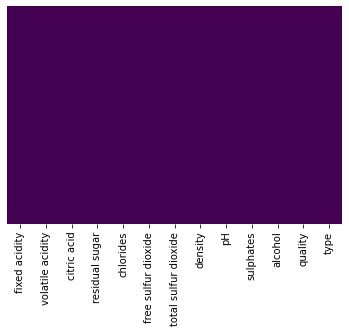

In [38]:
# Looking NA values with heatmap
import seaborn as sns
sns.heatmap(wine_shuff.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Before modeling, we first need to check whether the data contain NA values. If there are a lot of NA values in the data, it means that we will lose much helpful information in the process of data mining modeling. Also, data containing NA values can confuse the modeling process, resulting in unreliable output. Such uncertainties will also be more significant, and the law implied in the model will be more challenging to grasp. So, we first use isnull(). sum() function and heatmap to detect NA values. Fortunately, our data is very clean, with no missing values.

In [39]:
wine_shuff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [40]:
# Is a certain type of wine (red or white) associated with higher quality?
wine_shuff.groupby('type')['quality'].mean()

type
red      5.636023
white    5.877909
Name: quality, dtype: float64

Because 5.8 is greater than 5.6, the quality of white wine is slightly higher than that of red wine.

In [41]:
# Correlation between Quality and Features
correlation=wine_shuff.corr()
quality_corr=correlation["quality"]
quality_corr=quality_corr.sort_values(ascending=False)
#quality_corr_lower=quality_corr[(quality_corr)<0.2]
#quality_corr_higher=quality_corr[(quality_corr)>0.2]
quality_corr

quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

Wine quality has the highest correlation with alcohol. Other relation degrees are very low with each other,such as citric acid,free_sulfur_dioxide, sulphates and pH. Quality also has a low negative correlation with density,volatile acidity, chlorides, total_sulfur_dioxide and residual_sugar.

The absolute values of correlations were considered:
The columns pH,residual sugar,sulphates,total sulfur dioxide,free sulfur dioxide,fixed acidity,citric acid have very weak correlation (0.00 - 0.20); the columns chlorides,volatile acidity,density,and alcohol have weak correlation (0.20 - 0.40).

In [42]:
df_x = wine_shuff.iloc[:, [0,1,2,3,4,5,6,7,8,9,10]]
df_x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.3,0.25,0.44,11.6,0.041,48.0,195.0,0.99680,3.18,0.52,9.5
1,7.0,0.21,0.37,7.2,0.042,36.0,167.0,0.99580,3.26,0.56,9.8
2,10.7,0.67,0.22,2.7,0.107,17.0,34.0,1.00040,3.28,0.98,9.9
3,8.0,0.28,0.42,7.1,0.045,41.0,169.0,0.99590,3.17,0.43,10.6
4,5.5,0.16,0.26,1.5,0.032,35.0,100.0,0.99076,3.43,0.77,12.0
...,...,...,...,...,...,...,...,...,...,...,...
6492,7.6,0.48,0.37,1.2,0.034,5.0,57.0,0.99256,3.05,0.54,10.4
6493,6.6,0.45,0.43,7.2,0.064,31.0,186.0,0.99540,3.12,0.44,9.4
6494,7.2,0.26,0.26,12.7,0.036,49.0,214.0,0.99860,3.41,0.50,10.0
6495,8.0,0.60,0.22,2.1,0.080,25.0,105.0,0.99613,3.30,0.49,9.9


In [43]:
# Take target variable (quality) in Y
df_y = wine_shuff.iloc[:, [11]]
df_y

,quality
0,5
1,6
2,6
3,5
4,6
...,...
6492,3
6493,5
6494,6
6495,5


Split the Train and Test Data：
When assigning training and test sets, the smaller the data in the test set, the less accurate the estimation of the model's generalization error will be. Therefore, we need to make trade-offs when dividing the dataset.

In [44]:
from sklearn.model_selection import train_test_split
# split the features and target data sets into train and test sets
# training set: the data used to fit the model
# test set: the data partitioned away at the very start of the experiment (to provide an unbiased evaluation of the model)
# putting 80% of our data in the training set and 20% of our data in the test set 
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=521)
print('train/test shapes:')
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

train/test shapes:
(5197, 11) (1300, 11) (5197, 1) (1300, 1)


Linear Regression

In [45]:
# fit the linear model and test the score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
mrl=linear_model.LinearRegression()
mrl.fit(x_train, y_train) # the training set is used to build the model

LinearRegression()

In [46]:
pred1=mrl.predict(x_test) # the test set is used to predict
pred1

array([[5.04367843],
       [5.37832657],
       [5.83554923],
       ...,
       [5.56984899],
       [5.19750126],
       [5.42343821]])

In [47]:
coef_arr = mrl.coef_
print('coefficient = ', coef_arr)
# The regression coefficient is a parameter in the regression equation that expresses 
# the magnitude of the influence of the independent variable x on the dependent variable y. 
# A larger regression coefficient indicates that x has a greater influence on y, 
# a positive regression coefficient indicates that y increases as x increases, 
# and a negative regression coefficient indicates that y decreases as x increases.

coefficient =  [[ 9.59378877e-02 -1.28738771e+00 -1.16102436e-01  5.13079546e-02
  -3.39586684e-01  5.59217382e-03 -2.50754337e-03 -7.76270135e+01
   5.42230834e-01  8.43575817e-01  2.40216628e-01]]


In [48]:
# compare the predicted value with the true value,and rate them
test_score = mrl.score(x_test,y_test)
print('test score of model = ', test_score) # R_squared: the regression line explains 29% of the total variation in the response values.

# For the correlation coefficient r, |r|≤1, the closer |r| is to 1, 
# the greater the degree of correlation; the closer |r| is to 0, the smaller the degree of correlation.

# R² can also be used to determine the degree of fit. The closer the value of R² is to 1, 
# the better the fit of the regression line to the observed values; on the contrary, 
# the smaller the value of R², the worse the fit of the regression line to the observed values.

test score of model =  0.2945923833563917


In [49]:
# MSE: Mean Squared Error
# The mean squared error is the expected value of the squared difference between the parameter estimate and the true value of the parameter.
# MSE can evaluate the degree of change in the data. The smaller the value of MSE, 
# the better the accuracy of the prediction model in describing the experimental data.
from sklearn.metrics import mean_squared_error,r2_score,precision_score
print("The MSE of mrl is：",mean_squared_error(y_test, pred1))

The MSE of mrl is： 0.5245373471275777


Since R² is equal to 0.29, it means that our regression model is not fitting well. Meanwhile, the MSE of MRL is 0.52, which means our model is not accurate enough. In order to improve performance,we decided to rebuild the model with sklearn.

Since the precision of the wine data we imported is not the same, we need to normalize them first.
Normalization is a common requirement for machine learning tasks, and many algorithms assume that all features are centered around zero and have roughly the same variance.

Random Forest Regression

In [50]:
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor 
# A modeling pipeline that first transforms the data using StandardScaler(),
# and then fits the model using the random forest regressor RandomForestRegressor().
pipeline = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators= 100)) 

In [51]:
# Declaring hyperparameters
# Hyperparameters are parameters whose values are set before starting the learning process, 
# not parameter data obtained through training. Usually, hyperparameters need to be optimized, 
# and a set of optimal hyperparameters is selected for the learning machine to improve the performance and effect of learning.
hyperparameters = { 'randomforestregressor__max_features' : [ 'auto', 'sqrt', 'log2'], 
                   'randomforestregressor__max_depth':[ None, 5, 3, 1]}

In [52]:
# Model tuning
# Cross-validation is a process of reliably estimating the performance of a method that builds a model 
# by training and evaluating our model multiple times using the same method.
from sklearn.model_selection import GridSearchCV 
mrl2 = GridSearchCV(pipeline,hyperparameters,cv= 5) 
mrl2.fit(x_train, y_train) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             param_grid={'randomforestregressor__max_depth': [None, 5, 3, 1],
                         'randomforestregressor__max_features': ['auto', 'sqrt',
                                                                 'log2']})

In [53]:
# Predict x_test after using cross-validation
pred2 = mrl2.predict(x_test) 
pred2

array([5.11, 5.13, 6.  , ..., 5.06, 5.31, 5.26])

In [54]:
# Evaluate the Model
from sklearn.metrics import mean_squared_error,r2_score,precision_score
print("The R² value of mrl2 is：",r2_score(y_test,pred2)) 
print("The MSE of mrl2 is：",mean_squared_error(y_test, pred2))

The R² value of mrl2 is： 0.5504972566494917
The MSE of mrl2 is： 0.3342478461538462


Our R² increased from 29% to 55%. This means that the fit becomes higher. Moreover,the MSE also dropped from 52% to 33%. This means that the smaller the average distance of points in the test dataset from the model, the more accurate our model will be.

Use the Random Forest Regression to Predict the Wine Quality:

In [58]:
x_pre=pd.DataFrame({"fixed acidity":[6.4,7.1],
                    "volatile acidity":[0.27,0.28],
                    "citric acid":[0.30,0.35],
                    "residual sugar":[1.6,3.5],
                    "chlorides":[0.040,0.028],
                    "free sulfur dioxide":[19.0,35.0],
                    "total sulfur dioxide":[86.0,91.0],
                    "density":[0.99089,0.99022],
                    "pH":[3.32,2.96],
                    "sulphates":[0.65,0.33],
                    "alcohol":[11.5,12.1]})
x_pre

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.4,0.27,0.30,1.6,0.040,19.0,86.0,0.99089,3.32,0.65,11.5
1,7.1,0.28,0.35,3.5,0.028,35.0,91.0,0.99022,2.96,0.33,12.1


In [59]:
mrl2.predict(x_pre) 

array([6.15, 5.65])

Due to the improved fit and accuracy of the Random Forest Regression model, we use it to predict the wine quality. We fabricated two wines to verify the feasibility of the model. After that, we created a data frame to store values for the two wines for each one of the predictor variables in our model. And the quality of the two wines was 6.15 and 5.65, respectively.

Create a Simple UI for People to Predict Wine Quality

In [60]:
import PySimpleGUI as sg

In [61]:
# Define the layout, create the number of rows
layout = [      [sg.Text("Please Enter the Features of the Wine：")],      
                [sg.Text("Fixed Acidity: "),sg.InputText(key="1")],
                [sg.Text("Volatile Acidity: "),sg.InputText(key="2")],
                [sg.Text("Citric Acid: "),sg.InputText(key="3")],
                [sg.Text("Residual Sugar: "),sg.InputText(key="4")],
                [sg.Text("Chlorides: "),sg.InputText(key="5")],
                [sg.Text("Free Sulfur Dioxide: "),sg.InputText(key="6")],
                [sg.Text("Total Sulfur Dioxide: "),sg.InputText(key="7")],
                [sg.Text("Density: "),sg.InputText(key="8")],
                [sg.Text("Ph: "),sg.InputText(key="9")],
                [sg.Text("Sulphates: "),sg.InputText(key="10")],
                [sg.Text("Alcohol: "),sg.InputText(key="11")],
                [sg.Button("Forecast Quality")]
         ]

In [62]:
# create window
window = sg.Window("Wine Quality Predictor",layout)

In [63]:
while True:
        event,values = window.read()
        if event == "Forecast Quality":
           
           quality = mrl2.predict([[values['1'],values['2'],values['3'],values['4'],values['5'],values['6'],
                                 values['7'],values['8'],values['9'],values['10'],values['11']]])
            
           quality = "The quality of the wine is \n" + str(int(quality)) 
        
           sg.popup(quality,title= "Forecast Result")
            
        if event == None:
           break
window.close()